<h2>Processing the Data from Scraping</h2>
<h6>EDA (Exploratory Data Analysis) will be carried out to obtain the expected information</h6>
<ul>
    <li>How often do major actors and actresses get divorced ?</li>
    <li>How long do those marriages first or last ?</li>
    <li>How big are the age gaps ?</li>
    <li>How many result in children ?</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Additional for optional
from bs4 import BeautifulSoup
import requests
import re

In [2]:
dataset = pd.read_csv('External Output/artist_data_from_wikipedia.csv')

In [3]:
dataset

,full_name,birth_day,birth_place,age,occupation,year_active,spouse,total_marriage,total_divorced,partners,children,alma_mater,relatives,total_won,total_nominated
0,Teyana Me Shay Jacqueli Taylor,1990-12-10,"New York City, U.S.",31.0,"Actress,singer-songwriter,dancer,choreographer...",2005–present,Iman Shumpert ​(m. 2016)​,1.0,NaN,NaN,2.0,NaN,NaN,3,4
1,Elizabeth Chase Olsen,1989-02-16,"Los Angeles, California, U.S.",32.0,Actress,"1993–1996, 2010–present",NaN,NaN,NaN,Robbie Arnett (2016–present; engaged),NaN,New York University,Mary-Kate Olsen (sister)Ashley Olsen (sister),8,19
2,Brianne Howey,1989-05-24,"Los Angeles, California",32.0,Actress,2008–present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,Kiandra Layne,1991-12-10,"Cincinnati, Ohio",30.0,Actress,2015–present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Memphis Eve Sunny Day Iris Hewson,1991-07-07,"Dublin, Ireland",30.0,Actress,2008–present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,William James Murray,1950-09-21,"Evanston, Illinois, U.S.[1]",71.0,"Actor,comedian,writer",1973–present,Margaret Kelly\r\n​ ​(m. 1981; div. 1996)​Jenn...,1.0,1.0,NaN,6.0,NaN,Brian Doyle-Murray (brother)Joel Murray (brother),6,13
827,Ian David McShane,1942-09-29,"Blackburn, Lancashire, England",79.0,Actor,1962–present,Suzan Farmer\r\n​ ​(m. 1965; div. 1968)​Ruth P...,1.0,1.0,NaN,2.0,Royal Academy of Dramatic Art,NaN,3,13
828,Taraji Penda Henson,1970-09-11,"Washington, D.C., U.S.",51.0,Actress,1992–present,NaN,NaN,NaN,NaN,1.0,NaN,NaN,40,66
829,Uma Karuna Thurman,1970-04-29,"Boston, Massachusetts, U.S.",51.0,"Actress,writer,producer,model",1985–present,Gary Oldman\r\n​ ​(m. 1990; div. 1992)​\r\n\r\...,1.0,1.0,Arpad Busson (2007–2009; 2011–2014),3.0,NaN,Max von Schlebrügge (cousin),3,8


<h5>The number of each artist is based on age</h5>

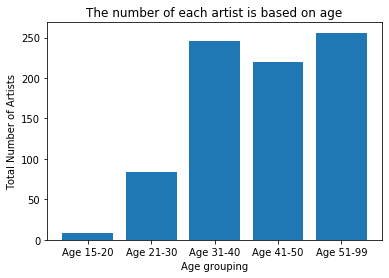

In [4]:
label_x = ['Age '+str(int(dataset.age.min()))+'-20', 'Age 21-30', 'Age 31-40', 'Age 41-50', 'Age 51-'+str(int(dataset.age.max()))]
values_y = [len(dataset[(dataset.age >= dataset.age.min()) & (dataset.age <= 20)]),
            len(dataset[(dataset.age > 20) & (dataset.age <= 30)]),
            len(dataset[(dataset.age > 30) & (dataset.age <= 40)]),
            len(dataset[(dataset.age > 40) & (dataset.age <= 50)]),
            len(dataset[(dataset.age > 50) & (dataset.age <= dataset.age.max())])
           ]
fig2, ax2 = plt.subplots()
ax2.bar(label_x, values_y)
plt.title('The number of each artist is based on age')
plt.xlabel("Age grouping")
plt.ylabel("Total Number of Artists")
plt.show()

<h5>The ratio of married and unmarried artists</h5>

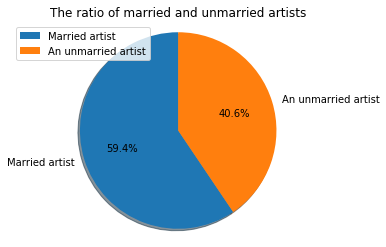

In [5]:
labels = 'Married artist', 'An unmarried artist'
married_artist = len(dataset[dataset['spouse'].notnull()])
unmarried_artist = len(dataset[dataset['spouse'].isnull()])
sizes = [married_artist, unmarried_artist]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The ratio of married and unmarried artists')
plt.legend()
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

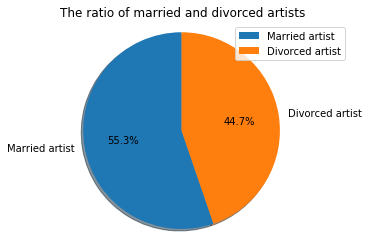

In [37]:
labels = 'Married artist', 'Divorced artist'
married_artist = len(dataset[(dataset['total_marriage'].notnull()) & (dataset['total_divorced'].isnull())])
divorced_artist = len(dataset[(dataset['total_divorced'].notnull()) & (dataset['total_marriage'].notnull())])
sizes = [married_artist, divorced_artist]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The ratio of married and divorced artists')
plt.legend()
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

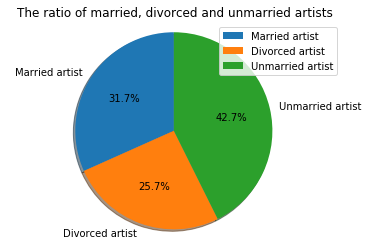

In [38]:
labels = 'Married artist', 'Divorced artist', 'Unmarried artist'
married_artist = len(dataset[(dataset['total_marriage'].notnull()) & (dataset['total_divorced'].isnull())])
divorced_artist = len(dataset[(dataset['total_divorced'].notnull()) & (dataset['total_marriage'].notnull())])
unmarried_artist = len(dataset[(dataset['total_marriage'].isnull()) & (dataset['total_divorced'].isnull())])
sizes = [married_artist, divorced_artist, unmarried_artist]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The ratio of married, divorced and unmarried artists')
plt.legend()
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h5>The number of each artist married is based on age</h5>

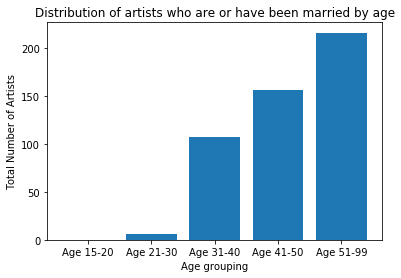

In [35]:
label_x = ['Age '+str(int(dataset.age.min()))+'-20', 'Age 21-30', 'Age 31-40', 'Age 41-50', 'Age 51-'+str(int(dataset.age.max()))]
values_y = [len(dataset[(dataset.age >= dataset.age.min()) & (dataset.age <= 20) & (dataset['spouse'].notnull())]),
            len(dataset[(dataset.age > 20) & (dataset.age <= 30) & (dataset['spouse'].notnull())]),
            len(dataset[(dataset.age > 30) & (dataset.age <= 40) & (dataset['spouse'].notnull())] ),
            len(dataset[(dataset.age > 40) & (dataset.age <= 50) & (dataset['spouse'].notnull())]),
            len(dataset[(dataset.age > 50) & (dataset.age <= dataset.age.max()) & (dataset['spouse'].notnull())])
           ]
fig2, ax2 = plt.subplots()
ax2.bar(label_x, values_y)
plt.title('Distribution of artists who are or have been married by age')
plt.xlabel("Age grouping")
plt.ylabel("Total Number of Artists")
plt.show()

<h5>The number of each artist unmarried is based on age (without patners)</h5>

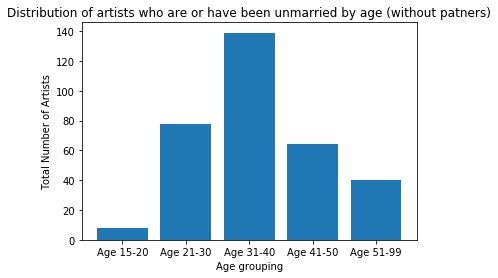

In [36]:
label_x = ['Age '+str(int(dataset.age.min()))+'-20', 'Age 21-30', 'Age 31-40', 'Age 41-50', 'Age 51-'+str(int(dataset.age.max()))]
values_y = [len(dataset[(dataset.age >= dataset.age.min()) & (dataset.age <= 20) & (dataset['spouse'].isnull())]),
            len(dataset[(dataset.age > 20) & (dataset.age <= 30) & (dataset['spouse'].isnull())]),
            len(dataset[(dataset.age > 30) & (dataset.age <= 40) & (dataset['spouse'].isnull())] ),
            len(dataset[(dataset.age > 40) & (dataset.age <= 50) & (dataset['spouse'].isnull())]),
            len(dataset[(dataset.age > 50) & (dataset.age <= dataset.age.max()) & (dataset['spouse'].isnull())])
           ]
fig2, ax2 = plt.subplots()
ax2.bar(label_x, values_y)
plt.title('Distribution of artists who are or have been unmarried by age (without patners)')
plt.xlabel("Age grouping")
plt.ylabel("Total Number of Artists")
plt.show()

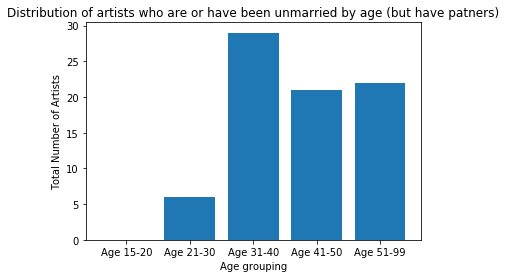

In [39]:
label_x = ['Age '+str(int(dataset.age.min()))+'-20', 'Age 21-30', 'Age 31-40', 'Age 41-50', 'Age 51-'+str(int(dataset.age.max()))]
values_y = [len(dataset[(dataset.age >= dataset.age.min()) & (dataset.age <= 20) & (dataset['spouse'].isnull()) & (dataset['partners'].notnull())]),
            len(dataset[(dataset.age > 20) & (dataset.age <= 30) & (dataset['spouse'].isnull()) & (dataset['partners'].notnull())]),
            len(dataset[(dataset.age > 30) & (dataset.age <= 40) & (dataset['spouse'].isnull()) & (dataset['partners'].notnull())] ),
            len(dataset[(dataset.age > 40) & (dataset.age <= 50) & (dataset['spouse'].isnull()) & (dataset['partners'].notnull())]),
            len(dataset[(dataset.age > 50) & (dataset.age <= dataset.age.max()) & (dataset['spouse'].isnull()) & (dataset['partners'].notnull())])
           ]
fig2, ax2 = plt.subplots()
ax2.bar(label_x, values_y)
plt.title('Distribution of artists who are or have been unmarried by age (but have patners)')
plt.xlabel("Age grouping")
plt.ylabel("Total Number of Artists")
plt.show()

<h5>The number of each artist divorced is based on age</h5>

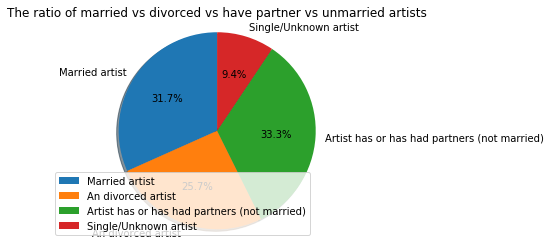

In [44]:
labels = 'Married artist', 'An divorced artist', 'Artist has or has had partners (not married)', 'Single/Unknown artist'
married_artist = len(dataset[(dataset['total_marriage'].notnull()) & (dataset['total_divorced'].isnull())])
divorced_artist = len(dataset[(dataset['total_divorced'].notnull()) & (dataset['total_marriage'].notnull())])
unmarried_artist = len(dataset[(dataset['total_marriage'].isnull()) & (dataset['total_divorced'].isnull()) & (dataset['partners'].isnull())])
partner_artist = len(dataset[(dataset['total_marriage'].isnull()) & (dataset['total_divorced'].isnull()) & (dataset['partners'].notnull()) ])
sizes = [married_artist, divorced_artist, unmarried_artist, partner_artist]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The ratio of married vs divorced vs have partner vs unmarried artists')
plt.legend()
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

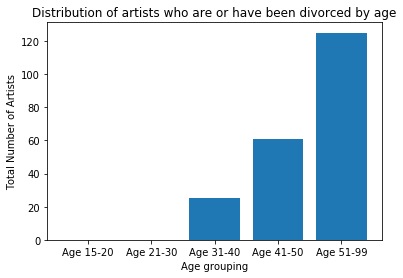

In [45]:
label_x = ['Age '+str(int(dataset.age.min()))+'-20', 'Age 21-30', 'Age 31-40', 'Age 41-50', 'Age 51-'+str(int(dataset.age.max()))]
values_y = [len(dataset[(dataset.age >= dataset.age.min()) & (dataset.age <= 20) & (dataset['spouse'].notnull()) & (dataset['total_divorced'].notnull())]),
            len(dataset[(dataset.age > 20) & (dataset.age <= 30) & (dataset['spouse'].notnull()) & (dataset['total_divorced'].notnull())]),
            len(dataset[(dataset.age > 30) & (dataset.age <= 40) & (dataset['spouse'].notnull()) & (dataset['total_divorced'].notnull())] ),
            len(dataset[(dataset.age > 40) & (dataset.age <= 50) & (dataset['spouse'].notnull()) & (dataset['total_divorced'].notnull())]),
            len(dataset[(dataset.age > 50) & (dataset.age <= dataset.age.max()) & (dataset['spouse'].notnull()) & (dataset['total_divorced'].notnull())])
           ]
fig2, ax2 = plt.subplots()
ax2.bar(label_x, values_y)
plt.title('Distribution of artists who are or have been divorced by age')
plt.xlabel("Age grouping")
plt.ylabel("Total Number of Artists")
plt.show()

<h5>Distribution of artists who have children</h5>

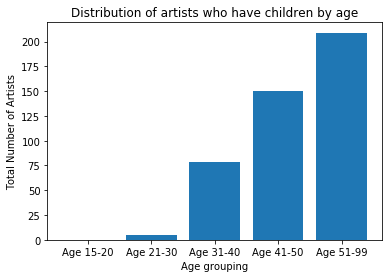

In [46]:
label_x = ['Age '+str(int(dataset.age.min()))+'-20', 'Age 21-30', 'Age 31-40', 'Age 41-50', 'Age 51-'+str(int(dataset.age.max()))]
values_y = [len(dataset[(dataset.age >= dataset.age.min()) & (dataset.age <= 20) & (dataset['children'].notnull())]),
            len(dataset[(dataset.age > 20) & (dataset.age <= 30) & (dataset['children'].notnull())]),
            len(dataset[(dataset.age > 30) & (dataset.age <= 40) & (dataset['children'].notnull())] ),
            len(dataset[(dataset.age > 40) & (dataset.age <= 50) & (dataset['children'].notnull())]),
            len(dataset[(dataset.age > 50) & (dataset.age <= dataset.age.max()) & (dataset['children'].notnull())])
           ]
fig2, ax2 = plt.subplots()
ax2.bar(label_x, values_y)
plt.title('Distribution of artists who have children by age')
plt.xlabel("Age grouping")
plt.ylabel("Total Number of Artists")
plt.show()

To know more about rate of divorced, based on `https://serc.carleton.edu/quirk/quantitive_writing/examples/23804.html` is

"The refined divorce rate is based on the number of divorces within all marriages existing at given time and is a usefull way to look at the chances of divorce occuring"

Note : The data that have analysis is only 800 rows, the fact is from website IMDb there is 6.094.592 artist/actor that have been write it. So this is only mini analysis and format for someone that want's to do more analysis with all that data based on this project

In [69]:
married_artist = len(dataset[(dataset['total_marriage'].notnull()) & (dataset['total_divorced'].isnull())])
divorced_artist = len(dataset[(dataset['total_divorced'].notnull()) & (dataset['total_marriage'].notnull())])

# Calculate and show it in percent
print( f'Rate of divorced {divorced_artist / married_artist * 100:.0f} %' )

Rate of divorced 81 %


<center>--- We have to labeling the data ---</center>

<h6>Machine Learning Supervised</h6>
<ul>
    <li>There two label ("Indicated Divorce" and "Not Indicated Yet")</li>
    <li>The label's first consideration stems from the number of divorces of the intended artist</li>
    <li>The second label of consideration comes from those who have never been divorced</li>
</ul>
<h6>Machine Learning Unsupervised</h6>
<ul>
    <li>Because it doesn't have a label</li>
    <li>Machine Learning can be categorized as unsupervised</li>
</ul>

In [115]:
# But for now, i want to make classification based on label that we want to use
dataset_ml = dataset.copy()

In [116]:
# Process labeling based on rule or option
dataset_ml.loc[dataset_ml['total_divorced'].notnull(), "target_label"] = "Indicated Divorce"
dataset_ml.loc[dataset_ml['total_divorced'].isnull(), "target_label"] = "Not Indicated Yet"

<h5>After that we need to analyze various things in terms of the data we have</h5>

In [117]:
# Checks how much data you have, the number of columns and the type of data
dataset_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   full_name        831 non-null    object 
 1   birth_day        814 non-null    object 
 2   birth_place      826 non-null    object 
 3   age              814 non-null    float64
 4   occupation       825 non-null    object 
 5   year_active      816 non-null    object 
 6   spouse           494 non-null    object 
 7   total_marriage   476 non-null    float64
 8   total_divorced   214 non-null    float64
 9   partners         140 non-null    object 
 10  children         447 non-null    float64
 11  alma_mater       231 non-null    object 
 12  relatives        181 non-null    object 
 13  total_won        831 non-null    int64  
 14  total_nominated  831 non-null    int64  
 15  target_label     831 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 104.0+ KB


In [118]:
# This method is effective for knowing which data is categorical and numeric
categorical_type = list(dataset_ml.select_dtypes(include=['object']).columns)
numerical_type = list(dataset_ml.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {categorical_type}')
print(f'numerical variables:  {numerical_type}')

categorical variables:  ['full_name', 'birth_day', 'birth_place', 'occupation', 'year_active', 'spouse', 'partners', 'alma_mater', 'relatives', 'target_label']
numerical variables:  ['age', 'total_marriage', 'total_divorced', 'children', 'total_won', 'total_nominated']


In [119]:
# If there is duplicated data, require to drop that
dataset_ml.duplicated().sum()
dataset_ml.drop_duplicates(inplace=True) # For Droping Duplicated data

In [120]:
# Checking which data is unique and not
dataset_ml.nunique(axis=0)

full_name          831
birth_day          795
birth_place        515
age                 77
occupation         297
year_active        124
spouse             494
total_marriage       1
total_divorced       1
partners           140
children            17
alma_mater         171
relatives          181
total_won           71
total_nominated     97
target_label         2
dtype: int64

In [121]:
# Check how much data is empty and from where
dataset_ml.isna().sum()
# dataset_ml.isna().sum() / len(dataset_ml) * 100 # in percent

full_name            0
birth_day           17
birth_place          5
age                 17
occupation           6
year_active         15
spouse             337
total_marriage     355
total_divorced     617
partners           691
children           384
alma_mater         600
relatives          650
total_won            0
total_nominated      0
target_label         0
dtype: int64

In [122]:
dataset_ml.loc[dataset_ml['birth_day'].isnull()]

,full_name,birth_day,birth_place,age,occupation,year_active,spouse,total_marriage,total_divorced,partners,children,alma_mater,relatives,total_won,total_nominated,target_label
47,Clorinda Fiorentino,NaN,"Philadelphia, Pennsylvania, U.S.",NaN,"Actress, photographer",1984–2009,John Byrum (div. 1993),NaN,1.0,NaN,NaN,NaN,NaN,0,0,Indicated Divorce
74,Regé-Jean Page,NaN,"London, England",NaN,Actor,2004–present,NaN,NaN,NaN,NaN,NaN,National Youth Theatre Drama Centre London,NaN,0,1,Not Indicated Yet
94,Jennifer Robertson,NaN,Canada,NaN,"Actress,writer,comedian",1998–present,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,10,Not Indicated Yet
117,Natalia Anatolievna Shimanchuk,NaN,Uzbekistan,NaN,ActressModel,2002 – present,Amir Ebrahim Pahlavi Alam\r\n​ ​(m. 1998; div....,1.0,1.0,NaN,NaN,NaN,NaN,0,0,Indicated Divorce
125,Emily Hampshire,NaN,"Montreal, Quebec, Canada",NaN,Actress,1994–present,Matthew Smith (m. 2006; divorced),1.0,NaN,NaN,NaN,NaN,NaN,9,7,Not Indicated Yet
163,Andrea N. Parker,NaN,NaN,NaN,Actress,1988–present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,Not Indicated Yet
209,Kelly McCormack,NaN,"Vancouver, British Columbia, Canada",NaN,"Actress, writer, producer",2000s–present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Not Indicated Yet
225,Zazie Olivia Beetz,NaN,"Berlin, Germany",NaN,Actress,2013–present,NaN,NaN,NaN,NaN,NaN,Skidmore College (BA),NaN,0,0,Not Indicated Yet
231,Lucy Chet DeVito,NaN,"New York City, New York, U.S.",NaN,Actress,2005– present,NaN,NaN,NaN,NaN,NaN,Brown University,NaN,0,0,Not Indicated Yet
252,Jessica Rose BrownFindlay,NaN,NaN,NaN,Actress,2009–present,Ziggy Heath ​(m. 2020)​,1.0,NaN,NaN,NaN,NaN,NaN,1,3,Not Indicated Yet


There are 7 columns that have the average blank values for the intended artist. Some of the blanks may identify as follows :
<ul>
    <li>For columns that are empty, total marriage and empty total divorced, it can indicate that they are single or have a partner (engaged / dating) but not married</li>
    <li>For empty column partners, it's possible that the artist doesn't have a partner yet.</li>
    <li>For empty column children, it is possible because they are not married</li>
    <li>For the alma mater column that is empty because the data obtained on the artist's biodata is incomplete</li>
    <li>For an empty relatives column because it doesn't exist or the data doesn't exist</li>
</ul>
    
Suitable data handling is :
<ul>
    <li>For total marriage, total divorced, children because the are empty is indicated they are not married / divorced or single. This data can be filled to 0</li>
    <li>For column spouses, because the data has been represented on total marriages or total divorces, it is safe to delete. Because it is seen from the data that it is not unique and does not produce information</li>
    <li>(Optional) For the column spouse we can extract new data where there is data on the year of marriage and divorce. This data can be taken to find out the year of marriage and divorce or to find out the time span from marriage to divorce (if any)</li>
    <li>For column relatives because it is not unique, it does not have significant information and the data is incomplete (too many blanks). Then it is safe to delete</li>
    <li>For the alma mater column, although this data can be categorized as influencing, this data is incomplete. Temporarily deleted beforehand</li>
    <li>For an empty birthday, it is quite difficult to do the handling process. Because his age is also absent, it cannot be traced back to find out his birthday. Therefore, if you have an empty birthday but you don't have a written age (not only from that, but the data of marriage, divorce, spouse and some of them is empty). So it's safe to delete</li>
    <li>For the column birthday it has been represented to be the current age (2021). Then the column is also safe to delete</li>
    <li>For column full names is also not good, so it can be seen that the information contained is quite a bit. So it's safe to delete</li>
    <li>For the column birthplace that is too broad and not unique, it needs to be extracted again. This process takes the position of a region (country), so this column can be categorized and unique and has the information contained in the data.</li>
    <li>Then for column occupation it is quite wide and not too unique. There are things that can be extracted from this data, namely actors and actresses. The difference between the two words is the division of gender (actor for men and actress for women). So with this new information can be retrieved, namely the gender of the data</li>
</ul>

In [123]:
"""
    Handling our data based on summary that have been doing
""" 
# First decision
dataset_ml.loc[dataset_ml['total_marriage'].isnull(), "total_marriage"] = 0
dataset_ml.loc[dataset_ml['total_divorced'].isnull(), "total_divorced"] = 0
dataset_ml.loc[dataset_ml['children'].isnull(), "children"] = 0
# Second decision
dataset_ml.drop(columns=['partners', 'alma_mater', 'relatives'], inplace=True) # 'spouse', 
# Third decision
dataset_ml.dropna(subset=['birth_day','age'], inplace=True)
# Fourth decision
dataset_ml.drop("full_name", axis= 1, inplace= True)
# dataset_ml.drop("birth_day", axis= 1, inplace= True)

In [308]:
# Check again nan value
dataset_ml.isna().sum()

birth_place                 3
age                         0
gaps_year_active            0
gender                      0
age_artist_first_married    0
age_spouse_first_married    0
gaps_age_first_married      0
children                    0
total_won                   0
total_nominated             0
target_label                0
dtype: int64

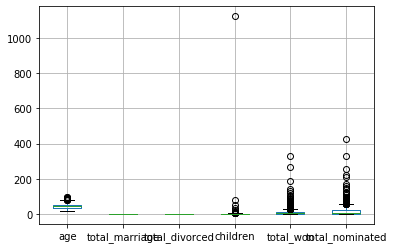

In [125]:
"""
    Check and Handling outlier data
"""
dataset_ml.boxplot()

Outliers is here not because the data is stated in error, but because of a comparison between artists and actors based on their experiences. This indicates that experience proves that the range of awards, marriages / divorces counts a lot

In [81]:
def outliers_perform_remove(data):
    sorted(data)
    Q1, Q3 = data.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [82]:
"""
This process may be can optional, but the data should handling we best decision
1. Drop the outlier value (decision 1)
2. Replace the outlier value using the IQR (decision 2)
3. All of numerical data
"""
# lower_data, upper_data = outliers_perform_remove(dataset_ml['age'])
# dataset_ml['age'] = np.where(dataset_ml['age'] > upper_data, upper_data, dataset_ml['age'])
# dataset_ml['age'] = np.where(dataset_ml['age'] < lower_data, lower_data, dataset_ml['age'])

In [208]:
def get_external_age_spouse(spouse_artist, first_birth_day, year_first_married_spouse):
    result_data = ''
    result_age_artist_when_married = 0
    result_age_spouse_when_married = 0
    result_gasp_age_spouse = 0
    
    # Avoid nan value
    if spouse_artist != spouse_artist:
        result_data = ''
    else:
        if year_first_married_spouse.find('m.') != -1:
            year_first_married_spouse = re.search('[0-9]+',re.search('\(([^)]+)', year_first_married_spouse).groups()[0].replace('m.\xa0','').replace('\xa0','').split(';')[0])
            if year_first_married_spouse:
                year_first_married_spouse = year_first_married_spouse.group()
                result_data = spouse_artist.split('(')[0].strip()
                x = requests.get('https://www.google.com/search?q='+result_data.replace(' ','+')+'+born+date')
                if len(BeautifulSoup(x.text, 'html.parser').findAll("div", {"class": "BNeawe iBp4i AP7Wnd"})) > 0:
                    result_data = BeautifulSoup(x.text, 'html.parser').findAll("div", {"class": "BNeawe iBp4i AP7Wnd"})[0].get_text(strip=True).split(' ')[-1]
                    if len(year_first_married_spouse) > 4:
                        year_first_married_spouse = year_first_married_spouse.split('⁠–')[0]
                    result_age_artist_when_married = abs(datetime.strptime(year_first_married_spouse,'%Y').year - datetime.strptime(first_birth_day.split('-')[0],'%Y').year)
                    if result_data.isnumeric():
                        result_age_spouse_when_married = datetime.strptime(year_first_married_spouse,'%Y').year - datetime.strptime(result_data,'%Y').year
                    else:
                        result_age_spouse_when_married = 0
                        result_gasp_age_spouse = abs(result_age_artist_when_married - result_age_spouse_when_married)
        
    return result_age_spouse_when_married, result_age_artist_when_married, result_gasp_age_spouse

In [209]:
dataset_ml.insert(6, 'age_artist_first_married', 0)
dataset_ml.insert(7, 'age_spouse_first_married', 0)
dataset_ml.insert(8, 'gaps_age_first_married', 0)
for i in range(len(dataset_ml['spouse'])):
    age_spouse = get_external_age_spouse(dataset_ml.iloc[i,5], dataset_ml.iloc[i,0] , dataset_ml.iloc[i,5])[0]
    age_artist = get_external_age_spouse(dataset_ml.iloc[i,5], dataset_ml.iloc[i,0] , dataset_ml.iloc[i,5])[1]
    diff_age = get_external_age_spouse(dataset_ml.iloc[i,5], dataset_ml.iloc[i,0] , dataset_ml.iloc[i,5])[2]
    dataset_ml.iloc[i,6] = age_artist
    dataset_ml.iloc[i,7] = age_spouse
    dataset_ml.iloc[i,8] = diff_age

dataset_ml.drop(columns=['birth_day', 'spouse'], inplace=True)

In [271]:
def gasps_year_active_until_now(year_string):
    count_active = 0
    if year_string == year_string:
        for between_year in year_string.split(','):
            between_year = between_year.strip()
            if between_year.find('-') != -1:
                year_split = between_year.split('-')
            else:
                year_split = between_year.split('–')
            start_date = ''
            end_year = ''
            print(between_year)
            if len(year_split) > 0:
                if len(year_split) == 1:
                    year_split.append('present') 
                if year_split[1].strip().lower().find('present') != -1 :
                    year_split[0] = datetime.strptime(re.search('[0-9]+',year_split[0]).group(),'%Y').year
                    year_split[1] = datetime.now().year
                    count_active += year_split[1] - year_split[0]
                elif year_split[0].strip().lower().find('present') == -1 or year_split[1].strip().lower().find('present') == -1:
                    year_split[0] = datetime.strptime(re.search('[0-9]+',year_split[0]).group(),'%Y').year
                    year_split[1] = datetime.strptime(re.search('[0-9]+',year_split[1]).group(),'%Y').year
                    count_active += year_split[1] - year_split[0]
    return count_active

In [273]:
# Insert new column of gaps year of active
dataset_ml.insert(4, 'gaps_year_active', 0)
for i in range(len(dataset_ml['year_active'])):
    dataset_ml.iloc[i,4] = gasps_year_active_until_now(dataset_ml.iloc[i,3])
# Remove column year_active
dataset_ml.drop("year_active", axis=1, inplace=True)

2005–present
1993–1996
2010–present
2008–present
2015–present
2008–present
1992–present
2012–present
1999–present
2011–present
1977–present
2012-present
1998–present
1999–present
1989–present
2003–present
2005-present
2013–present
1995–present
1982–present
2006–present
2007–present
1997–present
2008–present
2006–present
1995–present
1992–present
2004–present
2014–present
2012–present
1984–present
1982–present
1993–present
2004–present
2010–present
2000–present
2010–present
1972–1995
1984–present
1994–present
1994–present
1992–present
2011–present
2001–present
2006–present
1999–present
2001–present
1981–present[1][2]
1994–present
1953–present
1996–present
2011–present
2006–present
2003–present
1985–present
2004–present
2001–present
1996–present
2003–present
1981–present
1999–present
1997–present
2013–present
1998–present
1997–present
2004–present
1988–present
1998–present
1989–present
1998–present
1981–present
1998–present
2005–present
1998–present
2010–present
1995–present
2004–present

2004–Present
1999–present
2009–present
2001–present
1993–present
1990–present
1981–present
1992–present
1987–2012 (actress) 2004–present (fashion designer)
1987–present
2000–present
1997–present
1985–present
1991–present
2000–present
1945–2015
1993–present
1989–present
2009–present
1999–present
1957–present
1994–present
1985–present
1991–present
2004–present
1992–present
1962–present
1990–present
1991–present
1993–2012
2017–present
2004–present
2007–present
2007–present
2004–present
1991–present
2007–present
1985–present
1985–present
1952–present
1983–present
1996–present
1995–present
2006–present
1984–present
2002–present
1993–present
1990–present
1996–present
2004–present
1991–present
1999–present
1988–present
1995–present
2006–present[1]
2000–present
1976–present
1944–2004[1]
1974–present
1981–present
1994–present
2011–present
1994; 2004–present
1994–present
2011–present
1983–present
1982–present
2007–present
1991–present
1994–present
1991–2009
1979–present
1973–present
1981–present

After extracting and adding information from the number of years of experience as an artist / actor, the year_active column can be deleted

In [298]:
def extract_data(info_string, position_extract):
    return info_string.split(' ')[position_extract].strip()

In [287]:
# Extracting birth_place into only country
for i in range(len(dataset_ml['birth_place'])):
    if dataset_ml.iloc[i,0] == dataset_ml.iloc[i,0]:
        dataset_ml.iloc[i,0] = re.search('[a-zA-Z.]+',extract_data(dataset_ml.iloc[i,0], -1)).group()

In [ ]:
# Extracting occupation into only gender and remove the occupation after extracting
dataset_ml.insert(3, 'gender', '')
for i in range(len(dataset_ml['occupation'])):
    if dataset_ml.iloc[i,2] == dataset_ml.iloc[i,2]:
        if extract_data(dataset_ml.iloc[i,2], 0) == 'Actress' or extract_data(dataset_ml.iloc[i,2], 0).find('Actress'):
            dataset_ml.iloc[i,3] = 'Women'
        elif extract_data(dataset_ml.iloc[i,2], 0) == 'Actor' or extract_data(dataset_ml.iloc[i,2], 0).find('Actor'):
            dataset_ml.iloc[i,3] = 'Men'
# Remove column occupation
dataset_ml.drop("occupation", axis=1, inplace=True)

In [302]:
# Now, we have to wipe out column total_marriage and total_divorced because for classification
# this column not have any reason
dataset_ml.drop(['total_marriage','total_divorced'], axis=1, inplace=True)
# But if you want anything else like clustering, there several thing you have to change

In [303]:
# Check again if needed
dataset_ml.head(10)
# dataset_ml.nunique(axis=0)

,birth_place,age,gaps_year_active,gender,age_artist_first_married,age_spouse_first_married,gaps_age_first_married,children,total_won,total_nominated,target_label
0,U.S.,31.0,16,,26,26,0,2.0,3,4,Not Indicated Yet
1,U.S.,32.0,14,,0,0,0,0.0,8,19,Not Indicated Yet
2,California,32.0,13,,0,0,0,0.0,0,0,Not Indicated Yet
3,Ohio,30.0,6,,0,0,0,0.0,0,0,Not Indicated Yet
4,Ireland,30.0,13,,0,0,0,0.0,0,0,Not Indicated Yet
5,England,50.0,29,,32,33,0,3.0,5,10,Not Indicated Yet
6,U.S.,33.0,9,,0,0,0,0.0,0,0,Not Indicated Yet
7,U.S.,48.0,22,,29,30,0,2.0,0,7,Not Indicated Yet
8,U.S.,32.0,10,,0,0,0,0.0,0,3,Not Indicated Yet
9,U.S.,57.0,44,,29,16,0,1.0,0,0,Indicated Divorce


<h5>The ratio labels data (Knowing and Checking Imbalanced Data)</h5>

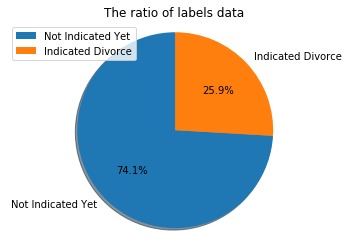

In [304]:
class_count_0, class_count_1 = dataset_ml['target_label'].value_counts()
labels = 'Not Indicated Yet', 'Indicated Divorce'
sizes = [class_count_0, class_count_1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The ratio of labels data')
plt.legend()
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h6>Conclusion</h6>
<ul>
    <li>At the end of the cleanup, extract new data and feature selection with unique information and values, leaving 12 features and 1 target. About 6 features are removed or discarded because the information contained is quite small or still needs further stages in processing. Some of that has been added</li>
    <li>There are 2 categorical data (or you could say gender as binary) and 1 categorical as target. The rest are of numerical type (7 numerical)</li>
    <li>The extracting process has resulted in new data such as age in terms of experience, gender and country position in order to facilitate categorization</li>
    <li>The results of the analysis state that the data is not balanced, so it needs to be addressed to provide a classification that does not tend to only one of the targets</li>
    <li>Before dealing with imbalanced data, this clean data needs to be transformed (normalizing and scaling) and encoding in the categorical feature.</li>
</ul>

---

<h5>Transforming Data</h5>

In [306]:
from sklearn.preprocessing import StandardScaler # Handling Numerical Data
from sklearn.preprocessing import OrdinalEncoder # Handling Categorical Data
from imblearn.over_sampling import RandomOverSampler # Handling Imbalanced Data

In [307]:
dataset_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 830
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   birth_place               811 non-null    object 
 1   age                       814 non-null    float64
 2   gaps_year_active          814 non-null    int64  
 3   gender                    814 non-null    object 
 4   age_artist_first_married  814 non-null    int64  
 5   age_spouse_first_married  814 non-null    int64  
 6   gaps_age_first_married    814 non-null    int64  
 7   children                  814 non-null    float64
 8   total_won                 814 non-null    int64  
 9   total_nominated           814 non-null    int64  
 10  target_label              814 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 116.3+ KB


In [309]:
# Normalize
standard_scaler = StandardScaler()
dataset_ml['age'] = standard_scaler.fit_transform(dataset_ml[['age']])
dataset_ml['gaps_year_active'] = standard_scaler.fit_transform(dataset_ml[['gaps_year_active']])
dataset_ml['age_artist_first_married'] = standard_scaler.fit_transform(dataset_ml[['age_artist_first_married']])
dataset_ml['age_spouse_first_married'] = standard_scaler.fit_transform(dataset_ml[['age_spouse_first_married']])
dataset_ml['gaps_age_first_married'] = standard_scaler.fit_transform(dataset_ml[['gaps_age_first_married']])
# If this column that wipe out, you have to command
# dataset_ml['total_marriage'] = standard_scaler.fit_transform(dataset_ml[['total_marriage']])
# dataset_ml['total_divorced'] = standard_scaler.fit_transform(dataset_ml[['total_divorced']])
dataset_ml['children'] = standard_scaler.fit_transform(dataset_ml[['children']])
dataset_ml['total_won'] = standard_scaler.fit_transform(dataset_ml[['total_won']])
dataset_ml['total_nominated'] = standard_scaler.fit_transform(dataset_ml[['total_nominated']])

In [312]:
# There is nan, to filled that have to impute with something else. But this is birth_place so there is to wide
# may be can filled with most frequent. (alternative can use SimpleImputer)
dataset_ml['birth_place']= dataset_ml['birth_place'].fillna(dataset_ml['birth_place'].value_counts().idxmax())

In [313]:
# Encoding
encoder = OrdinalEncoder()
dataset_ml['birth_place'] = encoder.fit_transform(dataset_ml[['birth_place']])
dataset_ml['gender'] = encoder.fit_transform(dataset_ml[['gender']])
dataset_ml['target_label'] = encoder.fit_transform(dataset_ml[['target_label']])

In [317]:
dataset_ml.shape

(814, 11)

In [326]:
X = dataset_ml.iloc[:,:-1]
y = dataset_ml.iloc[:,-1]

<h6>The final stage of data processing is the need to balance the data against the target. In accordance with what has been visualized</h6>
<ul>
    <li>Random Under-Sampling</li>
    <li>Random Over-Sampling</li> 
    <li>Random under-sampling with imblearn</li>
    <li>Random over-sampling with imblearn</li>
    <li>Under-sampling: Tomek links</li>
    <li>Synthetic Minority Oversampling Technique (SMOTE)</li>
    <li>NearMiss</li>
</ul>

So for now, because the data obtained or obtained from scraping results is small (I only scrape a small digit). Then it will use over sampling. Not only is it an advantage that no information is wasted but the disadvantage can create overfitting

In [328]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

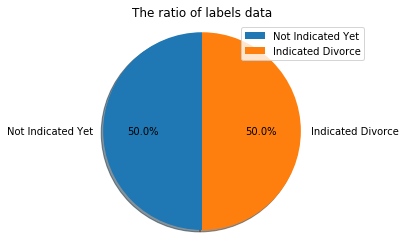

In [329]:
# This will give you base of all data after over sampling (this sampling make the data larger then old <2 times>)
class_count_0, class_count_1 = pd.concat([X_over,y_over], axis = 1)['target_label'].value_counts()
labels = 'Not Indicated Yet', 'Indicated Divorce'
sizes = [class_count_0, class_count_1]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The ratio of labels data')
plt.legend()
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h5>After knowing that the data is balanced against the targets, the classification process can be carried out</h5>

We have to know based approach for classification, used this images:
<img src="https://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/w1200-h630-p-k-no-nu/drop_shadows_background.png"></img>

<br>
<center>----- or -----</center>
<br>
Using popular algorithms :
1. Logistic Regression
2. k-Nearest Neighbors
3. Decision Trees
4. Support Vector Machine
5. Naive Bayes

In [344]:
# For first time we will use SVC
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2,random_state=123)

In [345]:
#Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel
clf = LogisticRegression() # Logistic Regression

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

C:\Users\Nazim Family\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [346]:
confusion_matrix(y_test, y_pred)

array([[90, 29],
       [37, 86]], dtype=int64)

In [347]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       119
         1.0       0.75      0.70      0.72       123

    accuracy                           0.73       242
   macro avg       0.73      0.73      0.73       242
weighted avg       0.73      0.73      0.73       242



The conclusion is that the SVC linear model gets an accuracy of about greater than 70%.

In the future, the algorithm used must be diverse and given a tuning process to achieve maximum accuracy, but still be monitored so as not to overfitting. Additionally, there may be need for more visualization of this classification algorithm or something else

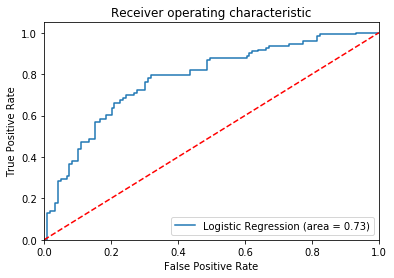

In [351]:
roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
# plt.savefig('ROC')
plt.show()

Good classifier stays as far away from that line as possible (toward the top-left corner).